In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
df=pd.read_csv('Week7_train.csv')
print(df.head())

   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         

In [3]:
print(df.shape)

(42000, 785)


In [4]:
# load 10% of the data from the actual df
selected_df=df.sample(frac=0.1, replace=False, random_state=1)
print(selected_df.shape)

(4200, 785)


In [5]:
print(selected_df.head())

       label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
29633      1       0       0       0       0       0       0       0       0   
345        5       0       0       0       0       0       0       0       0   
36369      2       0       0       0       0       0       0       0       0   
16624      8       0       0       0       0       0       0       0       0   
14389      4       0       0       0       0       0       0       0       0   

       pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  \
29633       0  ...         0         0         0         0         0   
345         0  ...         0         0         0         0         0   
36369       0  ...         0         0         0         0         0   
16624       0  ...         0         0         0         0         0   
14389       0  ...         0         0         0         0         0   

       pixel779  pixel780  pixel781  pixel782  pixel783  
29633         0         0   

In [6]:
# find no.of unique labels
print(selected_df['label'].unique())
# explain this
print(selected_df['label'].value_counts())

[1 5 2 8 4 0 7 9 6 3]
label
1    488
4    426
3    423
2    421
0    420
9    414
8    411
7    403
6    403
5    391
Name: count, dtype: int64


In [7]:
# print the no.of examples for each class labels
print(selected_df['label'].value_counts().sort_index())

label
0    420
1    488
2    421
3    423
4    426
5    391
6    403
7    403
8    411
9    414
Name: count, dtype: int64


In [8]:
# prepare x and y
x=selected_df.drop('label', axis=1)
y=selected_df['label']
print(x.shape, y.shape)

(4200, 784) (4200,)


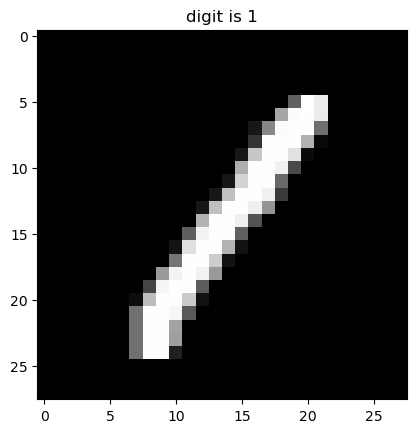

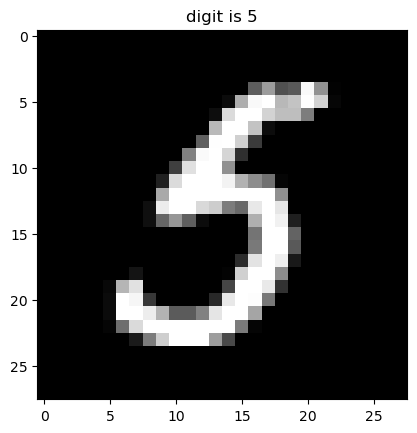

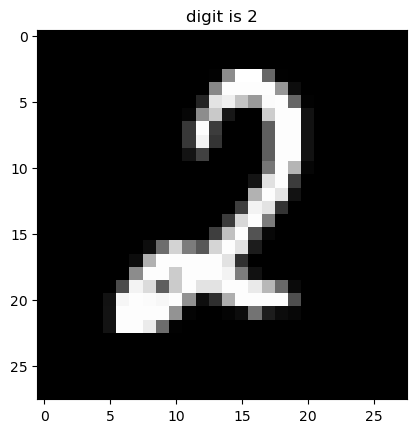

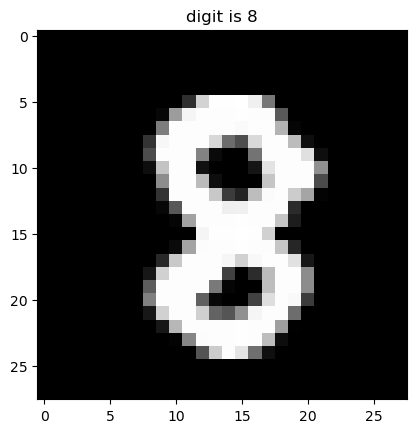

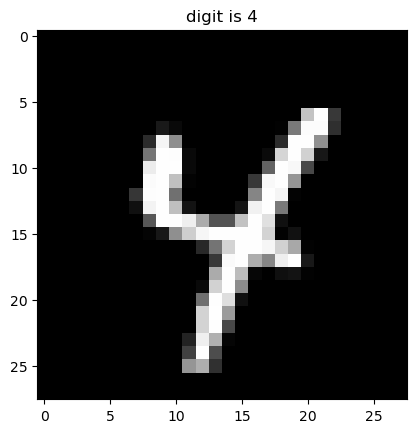

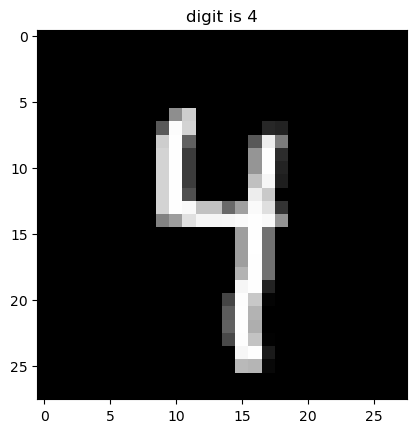

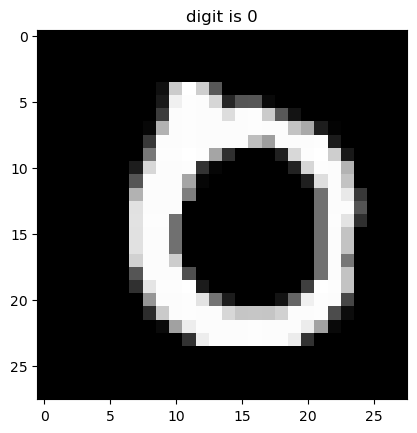

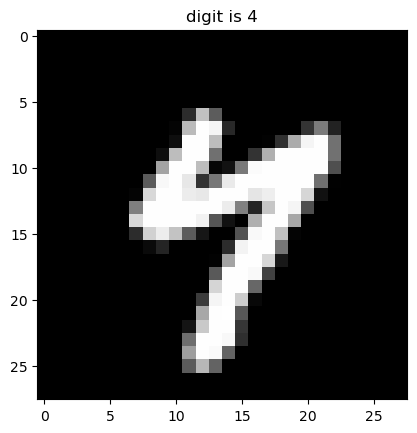

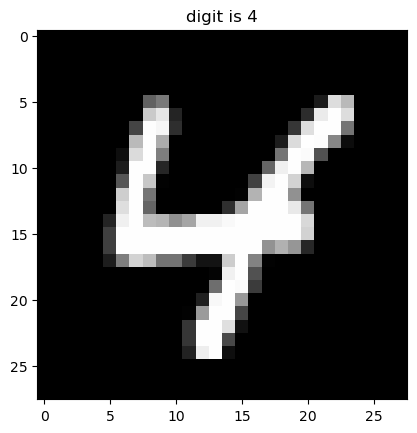

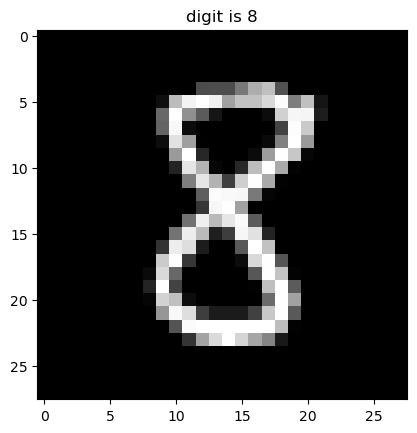

In [17]:
# visualize the image of first 5 digital in x - also print the class label
for i in range(10):
  plt.imshow(x.iloc[i].values.reshape(28,28), cmap='gray')
  plt.title(f"digit is {y.iloc[i]}") #print(y.iloc[i])
  plt.show()
  


In [10]:
# prepare the x and y in train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(3150, 784) (1050, 784) (3150,) (1050,)


In [11]:
# fit KNN classifiers to training data
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5,metric='minkowski', p=2)
knn.fit(x_train, y_train)


KNeighborsClassifier()

In [12]:
# default parameters n-neighbors=5,mertic='minkowski', p=2
# predict the validation set results
y_pred = knn.predict(x_test)
print(y_pred.shape)


(1050,)


In [13]:
# confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)




[[111   0   1   0   0   0   0   0   0   0]
 [  0 136   0   0   0   0   0   0   0   0]
 [  2   6  80   1   1   0   0   2   1   0]
 [  0   0   2 109   0   4   0   2   2   0]
 [  1   2   1   0 100   0   1   0   0   5]
 [  2   0   0   1   0  79   3   0   0   0]
 [  2   0   0   0   0   1  86   0   0   0]
 [  0   1   0   0   0   0   0  90   0   1]
 [  0   5   1   4   1   5   0   1  86   4]
 [  0   1   0   1   3   2   1   4   0  95]]


In [14]:
# print classification report and accuracy
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.94      0.99      0.97       112
           1       0.90      1.00      0.95       136
           2       0.94      0.86      0.90        93
           3       0.94      0.92      0.93       119
           4       0.95      0.91      0.93       110
           5       0.87      0.93      0.90        85
           6       0.95      0.97      0.96        89
           7       0.91      0.98      0.94        92
           8       0.97      0.80      0.88       107
           9       0.90      0.89      0.90       107

    accuracy                           0.93      1050
   macro avg       0.93      0.92      0.92      1050
weighted avg       0.93      0.93      0.92      1050

0.9257142857142857


       pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
16059       0       0       0       0       0       0       0       0       0   
11802       0       0       0       0       0       0       0       0       0   
41680       0       0       0       0       0       0       0       0       0   
20519       0       0       0       0       0       0       0       0       0   
26730       0       0       0       0       0       0       0       0       0   

       pixel9  ...  pixel774  pixel775  pixel776  pixel777  pixel778  \
16059       0  ...         0         0         0         0         0   
11802       0  ...         0         0         0         0         0   
41680       0  ...         0         0         0         0         0   
20519       0  ...         0         0         0         0         0   
26730       0  ...         0         0         0         0         0   

       pixel779  pixel780  pixel781  pixel782  pixel783  
16059         0       

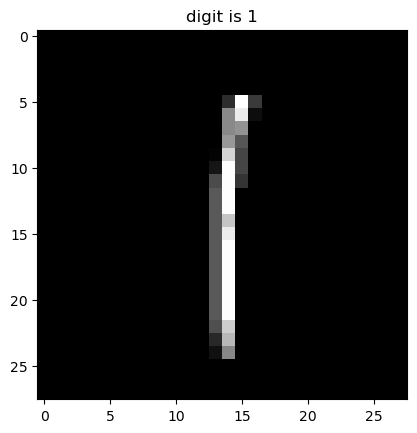

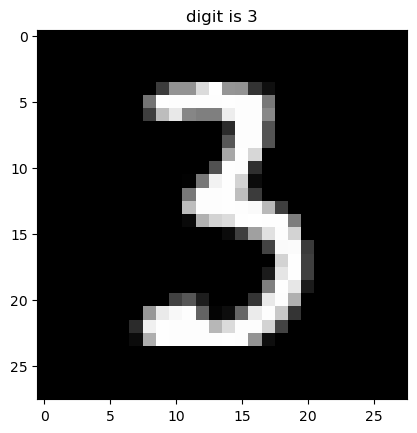

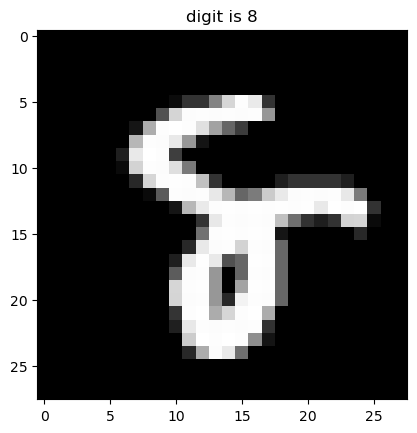

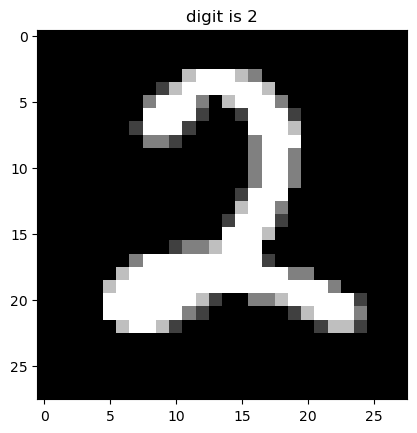

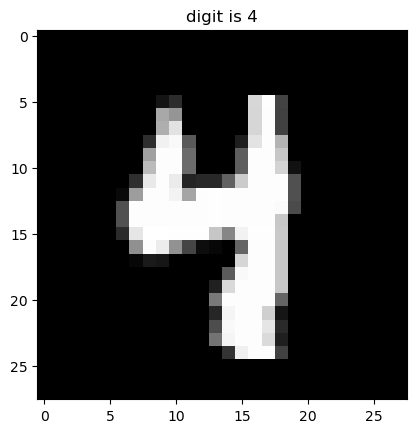

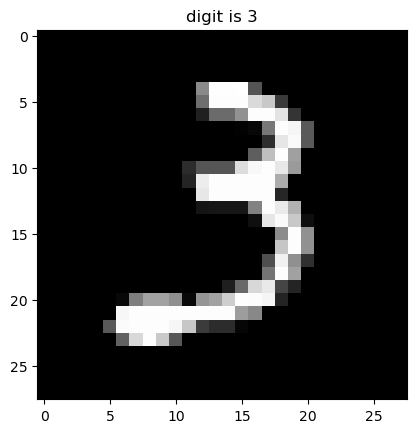

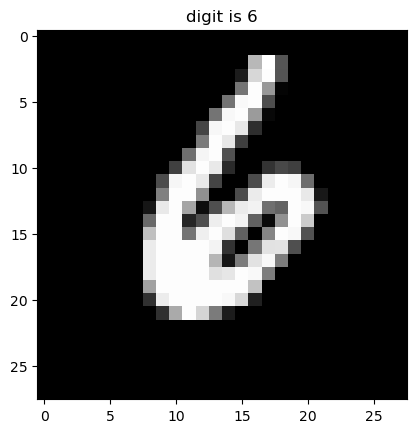

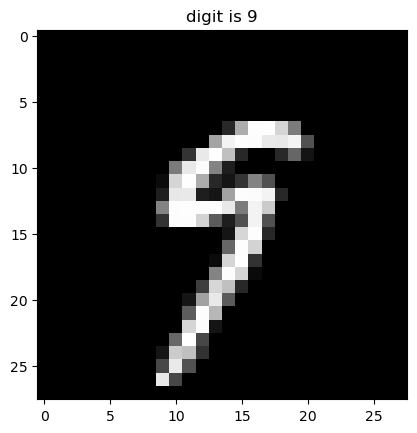

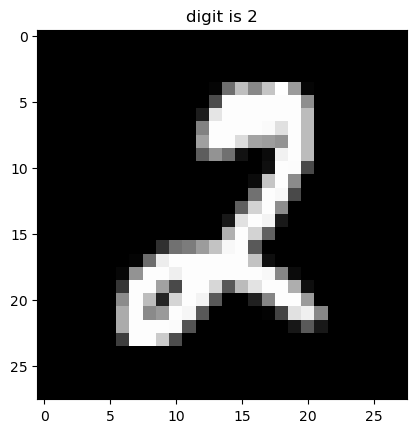

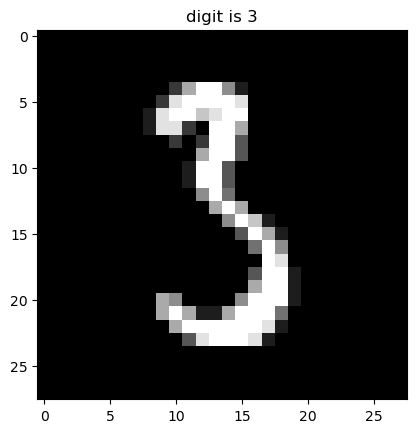

In [16]:
# visualise the first 5 images  of x_test and y_pred
print(x_test.head())
print(y_pred[:10])
for i in range(10):
  plt.imshow(x_test.iloc[i].values.reshape(28,28), cmap='gray')
  plt.title(f"digit is {y_pred[i]}")
  plt.show()
  
